Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Summary statistics:
                                    player                  team      name  \
count                                10754                 10754     10754   
unique                               10754                   374     10584   
top     /david-de-gea/profil/spieler/59377  Daejeon Hana Citizen  Paulinho   
freq                                     1                    46         6   
mean                                   NaN                   NaN       NaN   
std                                    NaN                   NaN       NaN   
min                                    NaN                   NaN       NaN   
25%                                    NaN                   NaN       NaN   
50%                                    NaN                   NaN       NaN   
75%                                    NaN                   NaN      

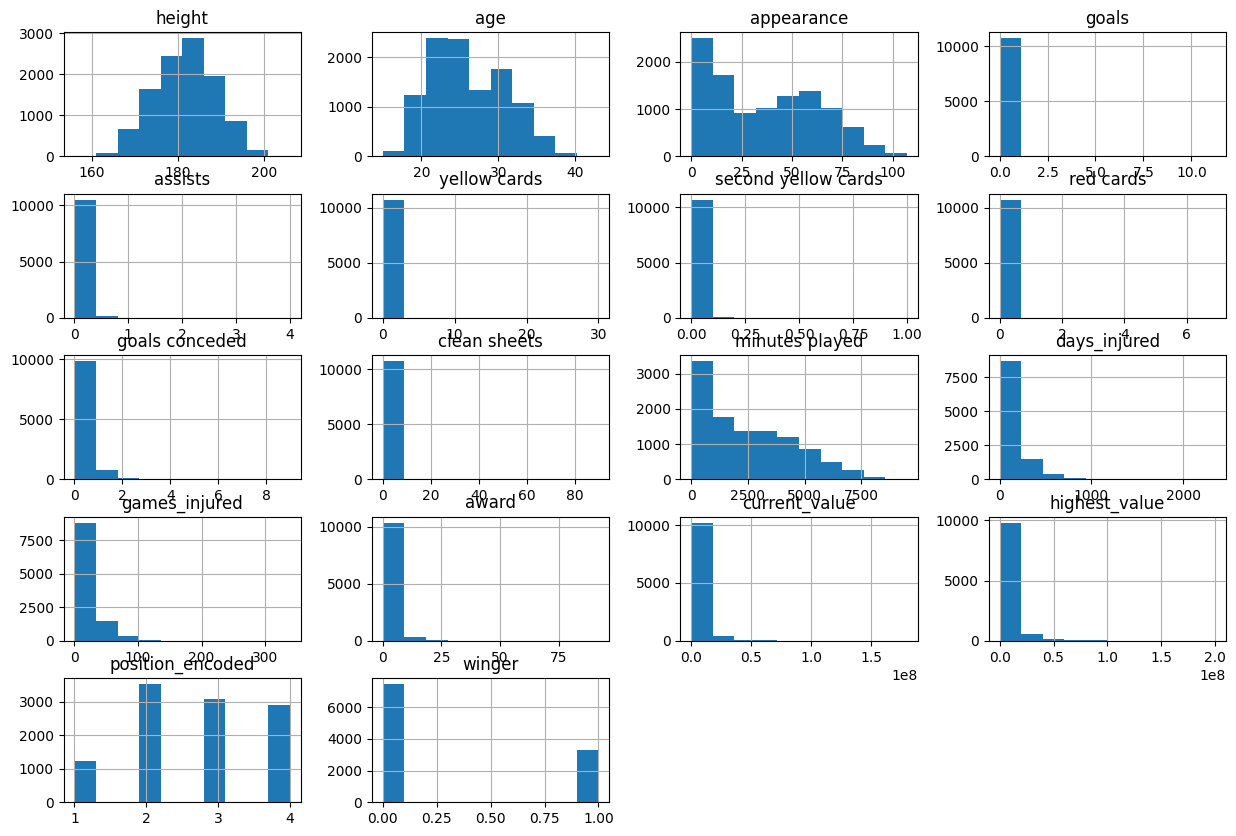


Mean Squared Error: 21864665400484.926

Model intercept:
-588238.7115764297

Model coefficients:
[ 6.09337463e-01 -5.34397564e+04  1.12348155e+03 -4.79088389e+05
  1.25144570e+06  8.81868348e+05  1.29623879e+05]


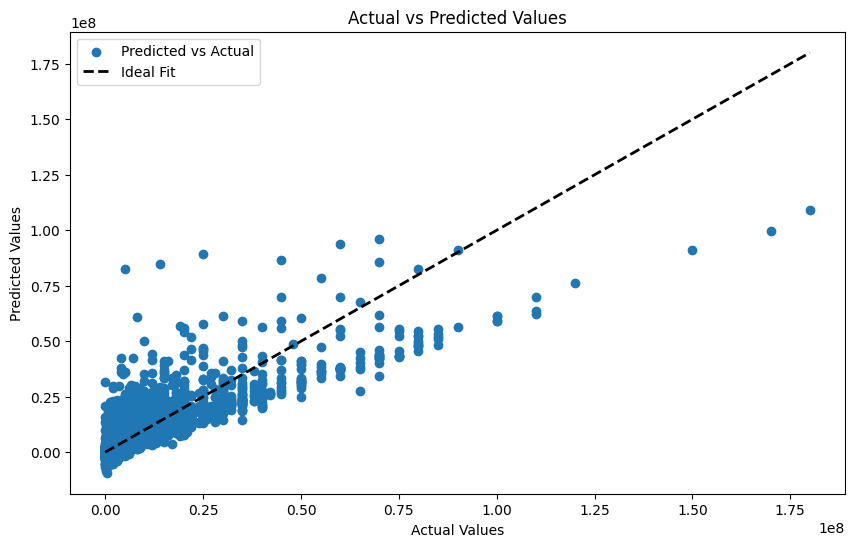

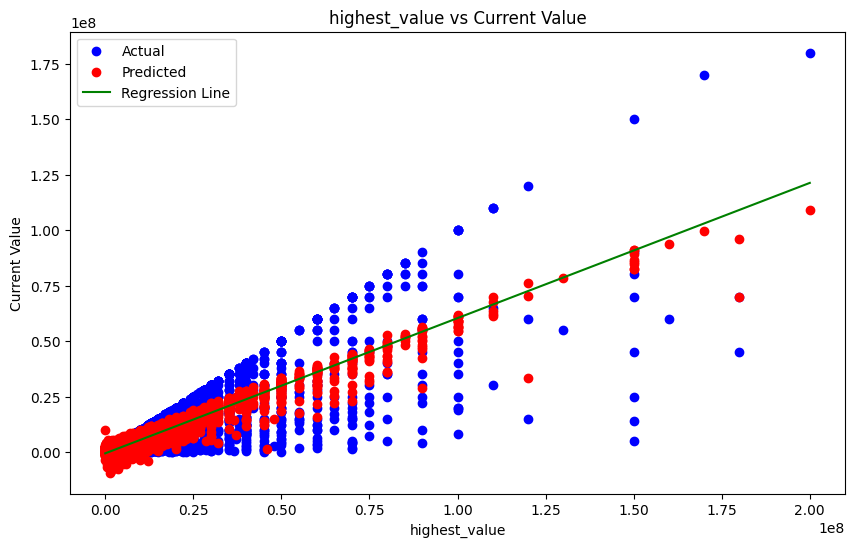

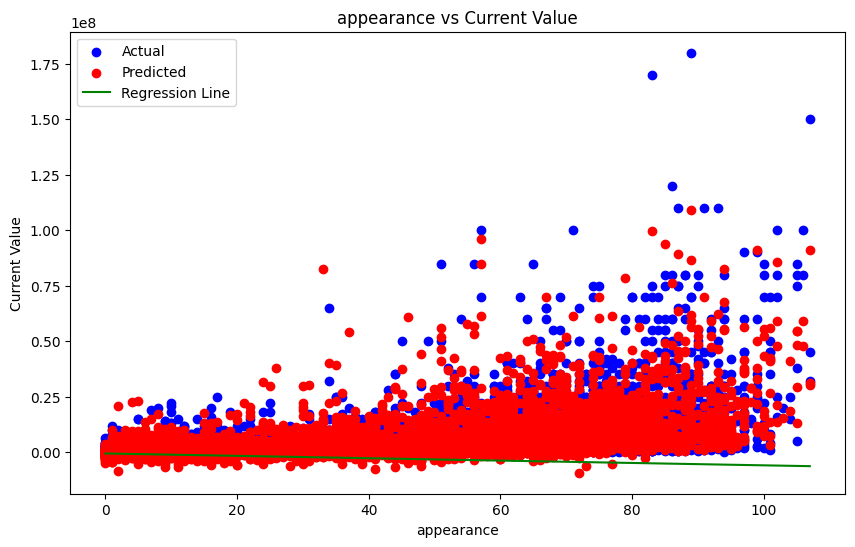

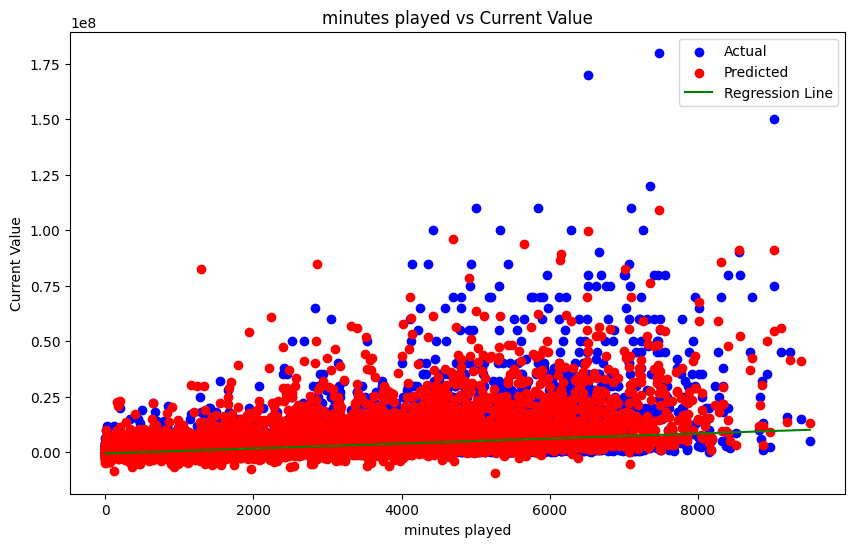

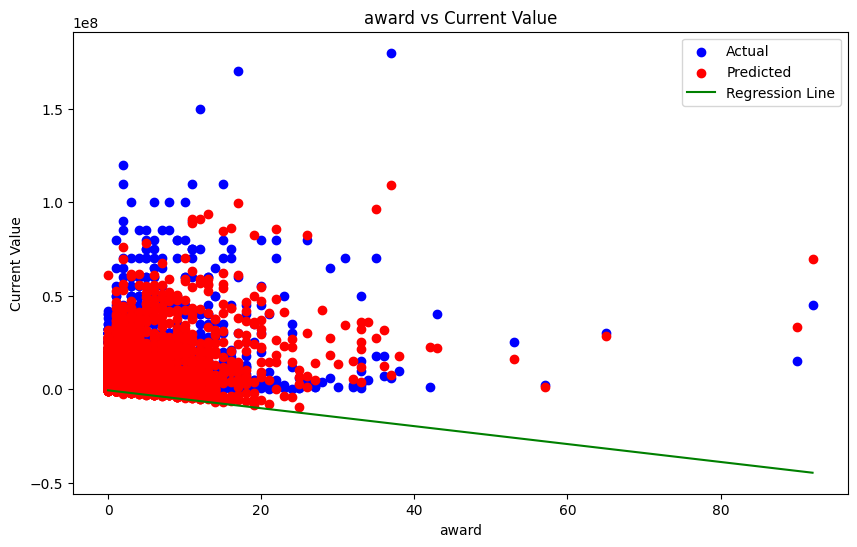

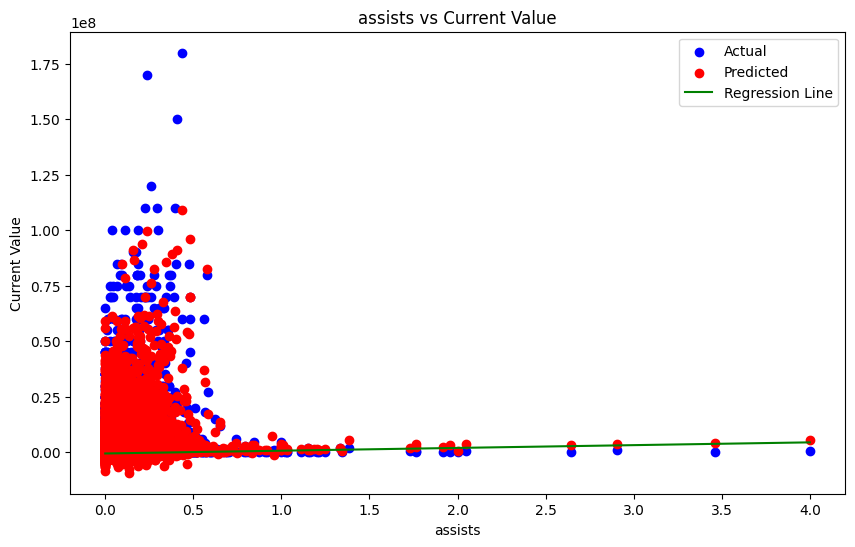

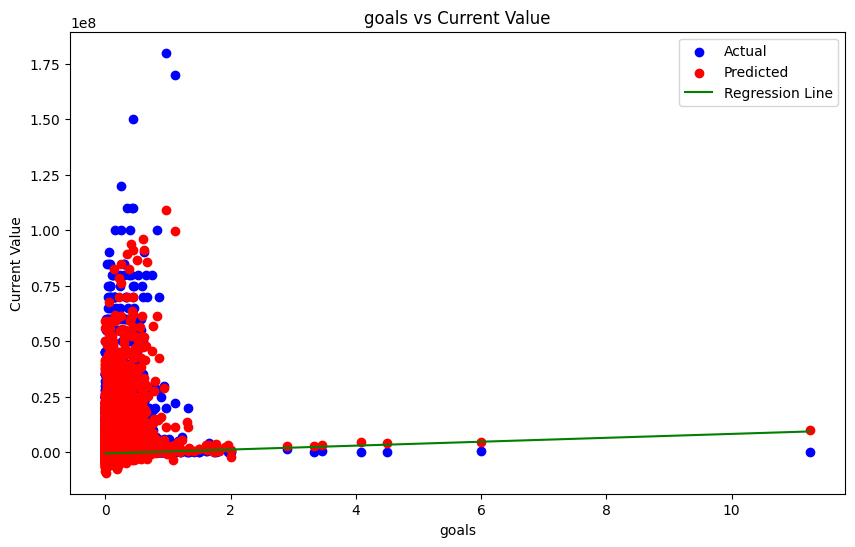

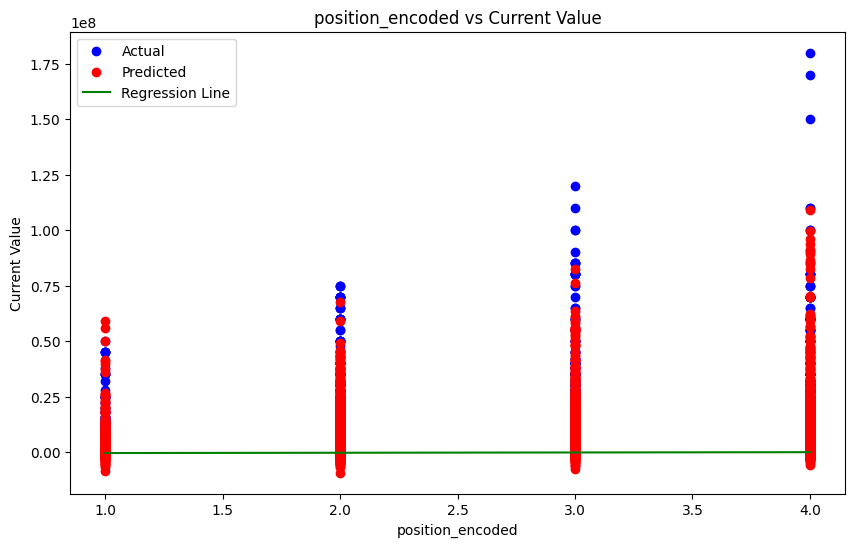

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')

# Read the dataset
df = pd.read_csv('/content/final_data.csv')


# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Visualize the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(15, 10))
plt.show()

# Selecting features to use and target variable
features = ['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals', 'position_encoded']
X = df[features].values
y = df['current_value'].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# Calculating mean squared error
mse = np.mean((y - y_pred) ** 2)
print(f'\nMean Squared Error: {mse}')

# Print model coefficients and intercept
print("\nModel intercept:")
print(model.intercept_)
print("\nModel coefficients:")
print(model.coef_)

# Scatter plot of predicted vs actual values with regression line
plt.figure(figsize=(10, 6))  # Single scatter plot size
plt.scatter(y, y_pred, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Linear regression plot for each feature
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))  # Single regression plot size
    plt.scatter(X[:, i], y, color='blue', label='Actual')
    plt.scatter(X[:, i], y_pred, color='red', label='Predicted')

    # Regression line
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    y_range = model.intercept_ + model.coef_[i] * x_range
    plt.plot(x_range, y_range, color='green', label='Regression Line')

    plt.xlabel(feature)
    plt.ylabel('Current Value')
    plt.title(f'{feature} vs Current Value')
    plt.legend()
    plt.show()


As it can be seen from the tables that goals and assists affect the current value of a football player in a good way. Whereas,award and appearance impact it diminishingly.
Also, as it can be seen MSE has a high value, it could be diminished by adding more data to the system or changing the features of the data.